In [7]:
import numpy as np
def sum_channels(data, int_only = True):
    """
    data = np array Nx x Ny representing a single response of the detector
    int_only = if False allows for countinous values for pixels
               if True all pixels are rounded to integers becasue number of photos is discreet. 
    """
    def get_channel(x,y,Nx,Ny):
        if x%2==1 or y%2==1:
            return 4  
        elif ( x < Nx / 2):
            if ( y < Ny / 2 ):
                return 0
            else: 
                return 2
        else:
            if ( y >= Ny / 2 ):
                return 3
            else:
                return 1
            
    channels=[0,0,0,0,0]
    Nx, Ny = data.shape
    for i in range(Nx):
        for j in range(Ny):
            channel = get_channel(i,j,Nx,Ny)
            if int_only:
                channels[channel] += np.round(data[i][j],0)
            else:
                channels[channel] += data[i][j]
    return np.round(channels,2)

In [8]:
# TEST
import pickle
with open('../neutron_images_new.pkl','rb') as file:
    data = pickle.load(file)
data = np.reshape(data, (-1, 44, 44))

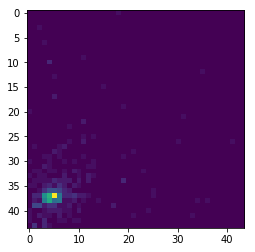

In [13]:
import matplotlib.pyplot as plt
test=data[400]
plt.imshow(test)
plt.show()

In [18]:
import pprint
pprint.pprint(test)
pprint(test.sum())

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 2., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 4., 0., ..., 0., 0., 0.]])


356.0

In [14]:
sum_channels(test,True)

array([  5.,  75.,   0.,   4., 272.])

In [21]:
pprint.pprint(test.sum() == sum_channels(test,True).sum())

True
